# Адаптивні методи бінаризації

In [200]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Метод Отсу

In [201]:
def rgb_to_gray(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)

    grayscale = 0.2989 * img_array[:, :, 0] + 0.5870 * img_array[:, :, 1] + 0.1140 * img_array[:, :, 2]

    return grayscale.astype('uint8'), img_array

def method_otsu(gray_image):
    total_pixels = gray_image.size
    pixel_counts = np.bincount(gray_image.flatten(), minlength=256)

    sum_total = np.dot(np.arange(256), pixel_counts)
    weight_background = 0
    sum_background = 0
    max_variance = 0
    threshold = 0

    for t in range(256):
        weight_background += pixel_counts[t]
        if weight_background == 0:
            continue
        
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break
        
        sum_background += t * pixel_counts[t]
        sum_foreground = sum_total - sum_background

        mean_background = sum_background / weight_background
        mean_foreground = sum_foreground / weight_foreground

        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        if variance_between > max_variance:
            max_variance = variance_between
            threshold = t

    binary_image = np.where(gray_image > threshold, 0, 255)
    return binary_image.astype('uint8'), threshold


### Метод Ніблека

In [202]:
def method_niblack(gray_image, window_size, k):
    if 1 == window_size % 2:
        window_size=window_size
    else:
        window_size=window_size+1
    k=k
    
    image = np.array(gray_image)
    height, width = image.shape
    output_image = np.zeros((height, width), dtype=np.uint8)
    
    for x in range(width):
        for y in range(height):
            
            window = []
            
            for i in range(-window_size // 2, window_size // 2 + 1):
                for j in range(-window_size // 2, window_size // 2 + 1):
                    if 0 <= x + i < width and 0 <= y + j < height:
                        window.append(image[y + j, x + i])

            m = np.mean(window)
            s = np.std(window)

            threshold = m + k * s

            if image[y, x] < threshold:
                output_image[y, x] = 0
            else:
                output_image[y, x] = 255

    return output_image

### Метод Саувола

In [203]:
def method_sauvol(gray_image, window_size, k, r):
    if 1 == window_size % 2:
        window_size=window_size
    else:
        window_size=window_size+1
    k=k
    r=r
    
    image = np.array(gray_image)
    height, width = image.shape
    output_image = np.zeros((height, width), dtype=np.uint8)
    
    for x in range(width):
        for y in range(height):
            
            window = []
            
            for i in range(-window_size // 2, window_size // 2 + 1):
                for j in range(-window_size // 2, window_size // 2 + 1):
                    if 0 <= x + i < width and 0 <= y + j < height:
                        window.append(image[y + j, x + i])

            m = np.mean(window)
            s = np.std(window)

            threshold = m * (1 + k * (s / r - 1))

            if image[y, x] < threshold:
                output_image[y, x] = 0
            else:
                output_image[y, x] = 255

    return output_image

### Метод Крістіана

In [204]:
def method_christian(gray_image, window_size, k, r):
    if 1 == window_size % 2:
        window_size=window_size
    else:
        window_size=window_size+1
    k=k
    r=r
    
    image = np.array(gray_image)
    height, width = image.shape
    output_image = np.zeros((height, width), dtype=np.uint8)
    
    min_gray = np.min(image)
    
    for x in range(width):
        for y in range(height):
            
            window = []
            
            for i in range(-window_size // 2, window_size // 2 + 1):
                for j in range(-window_size // 2, window_size // 2 + 1):
                    if 0 <= x + i < width and 0 <= y + j < height:
                        window.append(image[y + j, x + i])

            m = np.mean(window)
            s = np.std(window)

            threshold = (1-k) * m + k * min_gray + k * (s/r) * (m - min_gray)

            if image[y, x] < threshold:
                output_image[y, x] = 0
            else:
                output_image[y, x] = 255

    return output_image

##### Основна функція

In [205]:
def main(image_path):
    gray_image, original_image = rgb_to_gray(image_path)
    otsu_image, threshold = method_otsu(gray_image)
    niblack_image = method_niblack(gray_image, 100, -0.2)
    sauvol_image = method_sauvol(gray_image, 100, 0.2, 128)
    christian_image = method_christian(gray_image, 100, 0.5, 128)

    # Збереження результатів
    Image.fromarray(gray_image).save('grayscale_image_4.png')
    Image.fromarray(otsu_image).save('otsu_image_4.png')
    Image.fromarray(niblack_image).save('niblack_image_4.png')
    Image.fromarray(sauvol_image).save('sauvol_image_4.png')
    Image.fromarray(christian_image).save('christian_image_4.png')

In [206]:
# main('data/4.jpg')

### Таблиця порівняння 

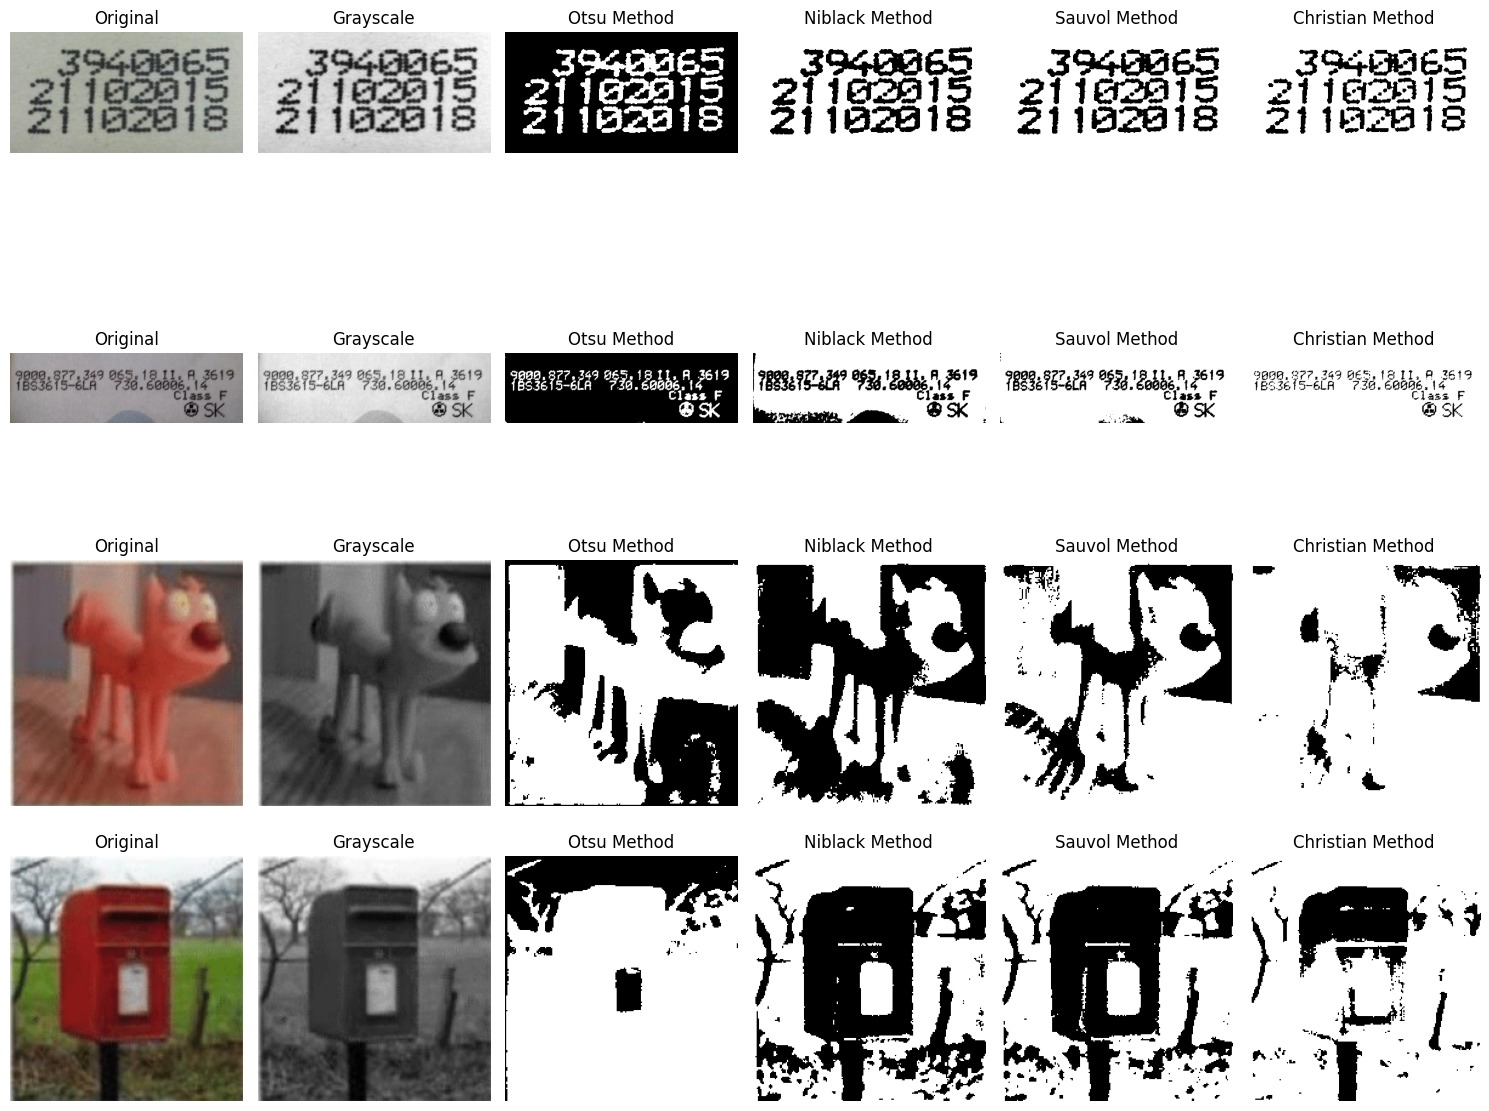

In [207]:
titles = ['Original', 'Grayscale', 'Otsu Method', 'Niblack Method', 'Sauvol Method', 'Christian Method']
image_paths = [
    ['data/1.jpg', 'data_results/grayscale_image_1.png', 'data_results/otsu_image_1.png', 'data_results/niblack_image_1.png', 'data_results/sauvol_image_1.png', 'data_results/christian_image_1.png'],
    ['data/2.jpg', 'data_results/grayscale_image_2.png', 'data_results/otsu_image_2.png', 'data_results/niblack_image_2.png', 'data_results/sauvol_image_2.png', 'data_results/christian_image_2.png'],
    ['data/3.jpg', 'data_results/grayscale_image_3.png', 'data_results/otsu_image_3.png', 'data_results/niblack_image_3.png', 'data_results/sauvol_image_3.png', 'data_results/christian_image_3.png'],
    ['data/4.jpg', 'data_results/grayscale_image_4.png', 'data_results/otsu_image_4.png', 'data_results/niblack_image_4.png', 'data_results/sauvol_image_4.png', 'data_results/christian_image_4.png']
]

fig, axes = plt.subplots(4, 6, figsize=(15, 12))

for i, row in enumerate(image_paths):
    for j, img_path in enumerate(row):
        img = mpimg.imread(img_path)
        ax = axes[i, j]
        if len(img.shape) == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)
        ax.set_title(titles[j])
        ax.axis('off')

plt.tight_layout()
plt.show()